In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
from google.colab import drive
drive.mount('/content/drive')
f_path = '/content/drive/MyDrive/AlohaCollisionDetector'
import sys
sys.path.insert(0,f_path)
%ls {f_path+'/data'}

Mounted at /content/drive
inphase_quadrature_data.json    inphase_quadrature_noise.json  iq_noise.npy
inphase_quadrature_library.npy  iq_data.npy


In [ ]:
# download the files to the folder
# iqdata =  np.load(f_path + '/data/' + 'iq_data.npy')
# iqnoise = np.load(f_path + '/data/' + 'iq_noise.npy')
# and import desired functions from it
# from functions import *
from plots import *
# from utilities import *

In [ ]:
# Read the uploaded files with data and noise
f_path = '/content/drive/MyDrive/AlohaCollisionDetector/data'
# Colab shared Runtime with no folder access requests empty f_path and manual file uploading
# f_path = ''
%ls {f_path} # Print the list of datafiles in the folder
f_prefx = '/inphase_quadrature_'

with open(f_path + f_prefx + 'data.json') as f:
  data = np.array(json.load(f))
with open(f_path + f_prefx + 'noise.json') as f:
  noise = np.array(json.load(f))
# Read the library files with centroids for Support Vector Machine
iqlib = np.load(f_path + f_prefx + 'library.npy')

inphase_quadrature_data.json    inphase_quadrature_noise.json  iq_noise.npy
inphase_quadrature_library.npy  iq_data.npy


In [ ]:
# @title
iqnames = [
    "Air", "Ant", "Arm", "Art", "Bag", "Bar", "Bat", "Bed", "Bee", "Boy",
    "Box", "Bus", "Cab", "Can", "Cap", "Car", "Cat", "Cow", "Cup", "Day",
    "Den", "Dog", "Dot", "Ear", "Egg", "End", "Era", "Eye", "Fan", "Fat",
    "Fig", "Fin", "Fly", "Fog", "Fox", "Fun", "Fur", "Gap", "Gas", "Gum",
    "Guy", "Hat", "Hen", "Her", "Hip", "Hog", "Hop", "Ice", "Ink", "Jaw",
    "Jet", "Job", "Joy", "Key", "Lab", "Lap", "Law", "Leg", "Lid", "Lip",
    "Log", "Man", "Map", "Mom", "Net", "Nun", "Nut", "Oil", "Owl", "Pan",
    "Paw", "Pen", "Pet", "Pig", "Pin", "Pit", "Pod", "Pop", "Pot", "Pub",
    "Pup", "Rag", "Ram", "Rat", "Rib", "Rim", "Rod", "Row", "Run", "Sad",
    "Sap", "Set", "Sit", "Sky", "Son", "Sum", "Sun", "Tag", "Tap", "Tip",
    "Toe", "Top", "Toy", "Van", "War", "Way", "Web", "Win", "Wig", "Tin",
    "Zip", "Jar", "Elk", "Cod", "Bin", "Hop", "Axe", "Hen", "Jam", "Job",
    "Pan", "Wax", "Yaw", "Rib", "Bay", "Gum", "Cub", "Bib"
]

[ 0.05794226-0.01438692j -0.24143587+0.05994792j -0.67005441+0.16637283j
 -1.03806803+0.25774969j -1.10900245+0.27536253j -0.74883953+0.18593498j
 -0.04890919+0.01214403j  0.67776102-0.16828637j  1.05260932-0.26136026j
  0.85745548-0.21290405j  0.18519419-0.04598326j -0.59312272+0.14727089j
 -1.03697889+0.25747926j -0.89547418+0.222344j   -0.25406656+0.06308409j
  0.52315419-0.12989788j  1.01490035-0.25199722j  0.98161235-0.24373189j
  0.4711915 -0.11699567j -0.25903863+0.06431864j -0.9242528 +0.22948966j
 -1.35680805+0.33689204j -1.52553148+0.37878565j -1.45780969+0.3619705j
 -1.16787021+0.28997925j -0.66516822+0.16515961j -0.01952434+0.00484785j
  0.60555457-0.15035768j  1.00975922-0.25072069j  1.06997957-0.26567325j
  0.81835901-0.20319649j  0.41942092-0.10414116j  0.0659676 -0.01637959j
 -0.12578652+0.03123248j -0.15309135+0.0380122j  -0.08877257+0.02204201j
 -0.01419675+0.00352502j  0.02619704-0.00650466j  0.03001998-0.00745389j]


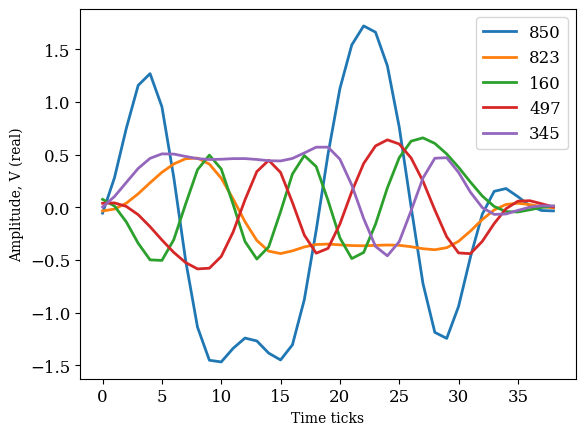

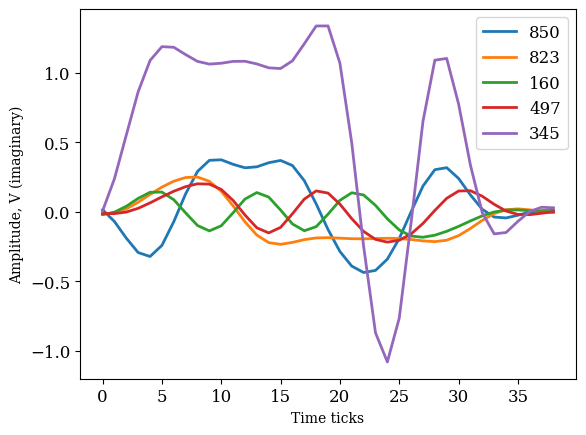

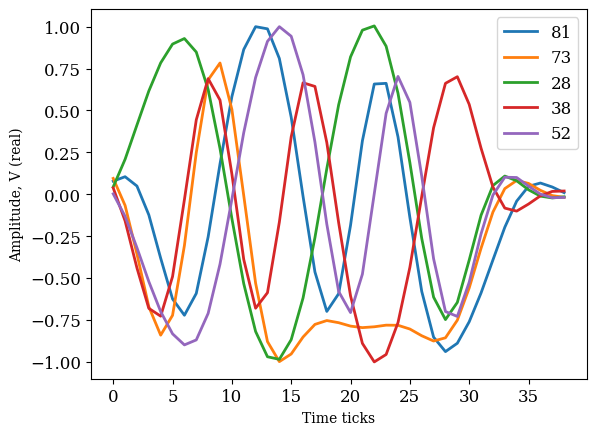

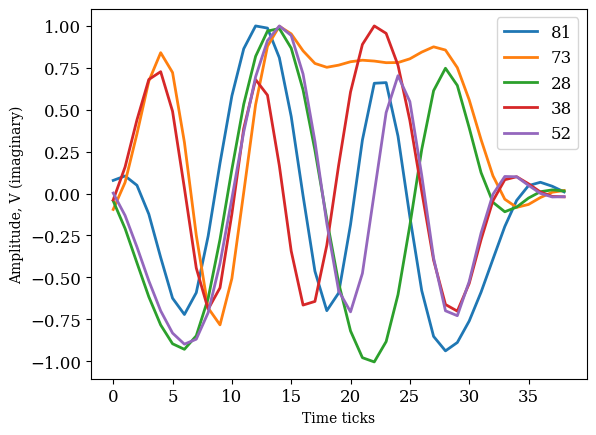

In [ ]:
iqdata = data[:,0,:] + 1j*data[:,1,:]
iqnoise = noise[:,0,:] + 1j*noise[:,1,:]
print(iqdata[111])

from plots import plt_cluster, plt_compare_vec
# plt_compare_vec(iqdata[111], iqdata[112])
plt_cluster(iqdata, np.random.choice(len(iqdata), 5, replace=False))
plt_cluster(iqlib, np.random.choice(len(iqlib), 5, replace=False))

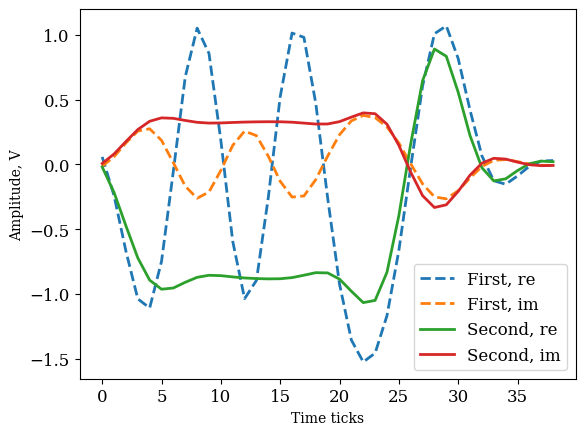

In [ ]:
_ =  np.load('/content/drive/MyDrive/AlohaCollisionDetector/data/iq_data.npy')
plt_compare_vec(_[111], _[181])

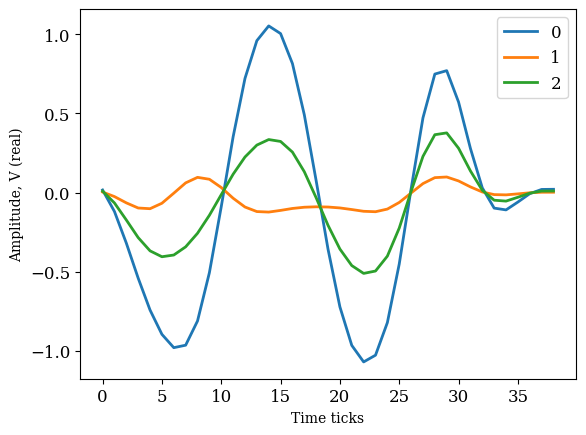

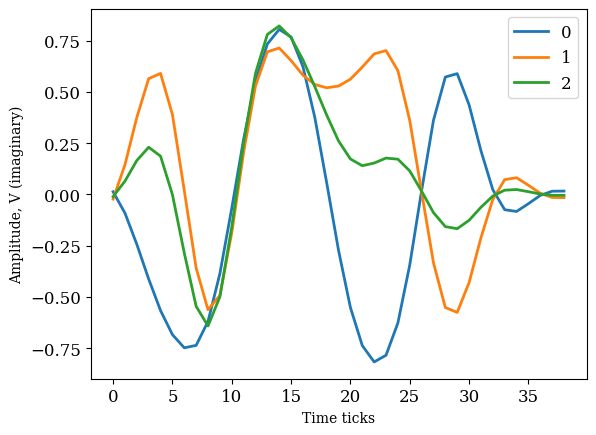

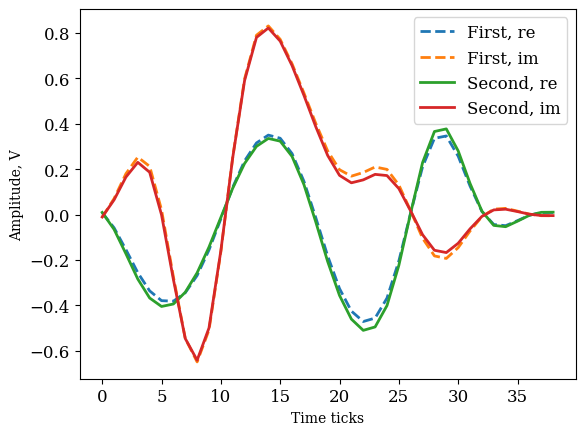

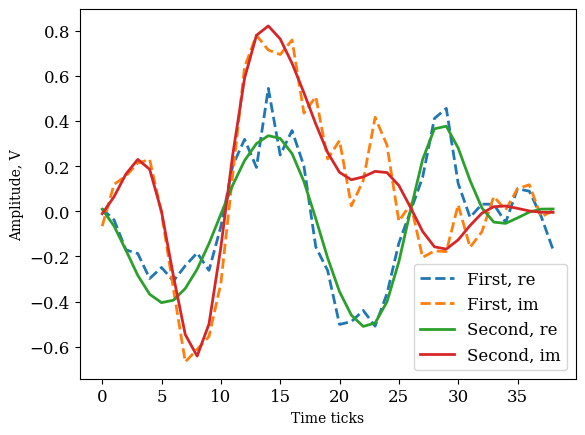

In [ ]:
# The initial demo, two-signal regression
# Use linear regression to find the optimal prohjections to the linear combination
from scipy.linalg import lstsq
# The model
idx = [189, 678, 768] # Get some data, two signals and noise
#print(iqdata[idx,:])
x1 = iqdata[idx[0]] # Two vectors for the span
x2 = iqdata[idx[1]]
eps = iqnoise[idx[-1]]
y = 0.4 * x1 + 0.7 * x2 # The model
#plt_compare_vec(x1, x2)
cluster = np.vstack((x1, x2, y))
plt_cluster(cluster, range(len(cluster)))
y_noise = y + eps
#print(y_noise)
# Construct the design matrix X
X = np.column_stack([x1, x2])
# Solve least squares problem
b, residuals, rank, s = lstsq(X, y_noise)
# Coefficients b, residuals (scalar), rank of X, singular values of X
plt_compare_vec(b[0] * x1 + b[1] * x2, y)
plt_compare_vec(y_noise, y)

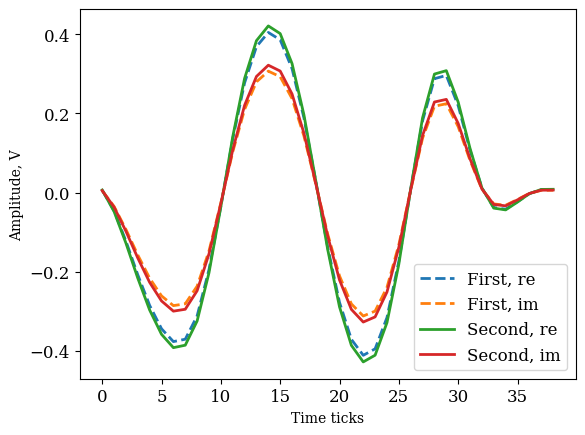

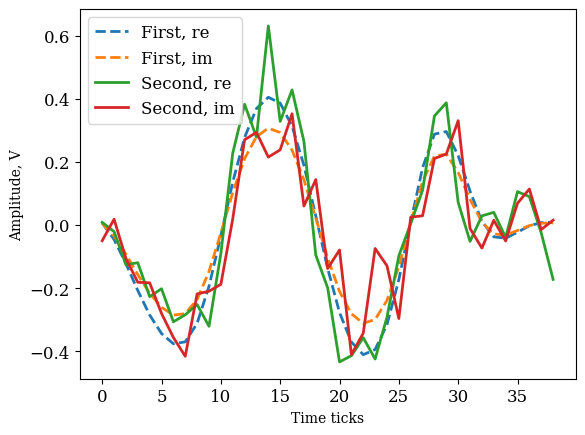

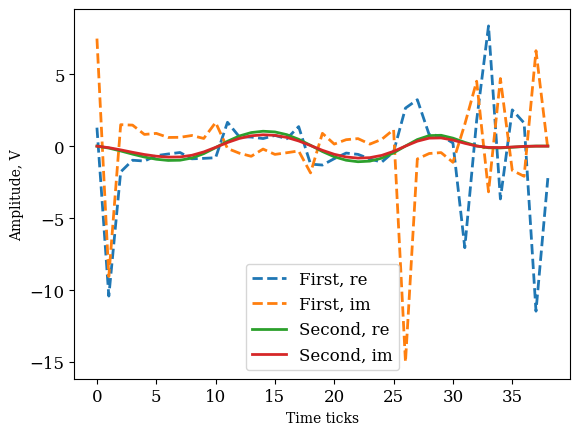

In [ ]:
# The one-signal regression
# Use linear regression to find the optimal prohjections to the linear combination
from scipy.linalg import lstsq
# The model
idx = [189, 768] # Get one signaland noise
#print(iqdata[idx,:])
x1 = iqdata[idx[0]] # Two vectors for the span
# x2 = iqdata[idx[1]]
eps = iqnoise[idx[-1]]
y = 0.4 * x1 # + 0.7 * x2 # The model
#plt_compare_vec(x1, x2)
cluster = np.vstack((x1, y))
#plt_cluster(cluster, range(len(cluster)))
y_noise = y + eps
#print(y_noise)
# Construct the design matrix X
X = np.column_stack([x1])
# Solve least squares problem
b, residuals, rank, s = lstsq(X, y_noise)
# Coefficients b, residuals (scalar), rank of X, singular values of X
plt_compare_vec(b[0] * x1, y)
plt_compare_vec(b[0] * x1, y_noise)

# WARNING! This is very illuminative and exemplary plot!
plt_compare_vec(b[0] / y_noise, x1)

In [ ]:
_ = np.array([1,2,3])
print(_[-1])

3


In [ ]:
def x_norm(x): # Real vector values to 0,1 segment
  min_val = np.min(x)
  return (x - min_val) / (np.max(x) - min_val)


Tru [ 0  5  9 10 11 13]
Cov [ 0  2  5 10 13 18] 4
Lsq [ 2  3  5  9 11 16] 3


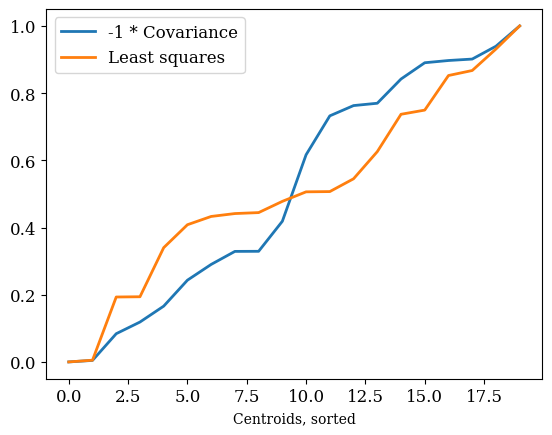

In [ ]:
# The up-to ten signal regression
num_of_signals = 6
K = len(iqlib[:20]) # Number of centroids
idx = np.random.choice(K, num_of_signals, replace=False)
b_init = np.random.uniform(0.5, 1, num_of_signals) # Generate unitformly distributed weights from 0.5 to 1
XT = iqlib[idx]
X = XT.transpose() # Resression uses the columns of the matrix
y_noise = X @ b_init + iqnoise[idx[-1]] # Here the indices are lesses then rank, but it is not important
b, residuals, rank, s = lstsq(X, y_noise)

# Try for the whole set
# Xlib = iqlib.transpose()
# b, residuals, rank, s = lstsq(Xlib, y_noise)
# plt.bar(range(len(b)), b)
# plt.show()

# Compare correlation and regression
d_cov = np.zeros(K, dtype=complex)
d_lsq = np.zeros(K)

for k in range(K):
  x = iqlib[k]
  cov = np.mean((x) * np.conj(y_noise))
  d_cov[k] = cov
  b, residuals, rank, s = lstsq(np.column_stack([x]), y_noise)
  d_lsq[k] = residuals
  #print(residuals)

dir_cov = d_cov.real + d_cov.imag

print('Tru', np.sort(idx))
cov_set = np.argsort(dir_cov)[-num_of_signals:]
lsq_set = np.argsort(d_lsq)[:num_of_signals]

cov_qty = len(set(idx) & set(cov_set))
lsq_qty = len(set(idx) & set(lsq_set))

print('Cov', np.sort(cov_set),cov_qty)
print('Lsq', np.sort(lsq_set),lsq_qty)

plt.plot(np.sort(x_norm(dir_cov[::-1])), label = '-1 * Covariance')
plt.plot(np.sort(x_norm(d_lsq)), label = 'Least squares')
plt.xlabel('Centroids, sorted', fontname='DejaVu Serif')
plt.legend()
plt.show()


In [ ]:
# Example sets of indexes
set1 = {0, 2, 4, 6}
set2 = {1, 2, 3, 4}

# Compute the intersection
intersection = set1 & set2

# Size of the intersection
intersection_size = len(intersection)
print(intersection_size)
print(intersection)

2
{2, 4}


In [ ]:
print(residuals)
print(residuals.dtype)

79.94924194970615
float64


In [ ]:
# Make mixture of couples of time series
n = len(iqdata)
iqmixture = np.empty((n, iqdata.shape[1]), dtype=complex)
mixture_ans = np.empty((n, 3)) # Two first are the indexes of the mixture
for i in range(n):
  idx = np.random.choice(n, 3, replace=False)
  z = iqdata[0] + iqdata[1] + iqnoise[2]
  iqmixture[i] = z
  mixture_ans[i] = idx # Two indexes of the mixture
  #print(z)

In [ ]:
n = len(iq_lib)
iqmixture = np.empty((n, iq_lib.shape[1]), dtype=complex)
mixture_ans = np.empty((n, 3)) # Two first are the indexes of the mixture
for i in range(n):
  idx = np.random.choice(n, 3, replace=False)
  z = iq_lib[idx[0]] + iq_lib[idx[1]] +  iqnoise[idx[2]]
  iqmixture[i] = z
  mixture_ans[i] = idx # Two indexes of the mixture
  #print(idx)

NameError: name 'iq_lib' is not defined

In [ ]:
from itertools import combinations #, cycle

In [ ]:
# Find the nearest couple of the mixture origins using centroids from iq_lib
K = len(iq_lib)

y = iqmixture[23]
ans = mixture_ans[23]

pairs = list(combinations(range(K), 2))
errs = np.inf * np.ones((K,K))

for i, j in pairs:
  x1 = iq_lib[i]
  x2 = iq_lib[j]
  X = np.column_stack([x1, x2]) # Prepare and solve least squares
  b, residuals, rank, s = lstsq(X, y)
  err = np.linalg.norm(y - X @ b, ord=2)
  errs[i, j] = err
  # plt_compare_vec(b[0] * x1 + b[1] * x2, y)

err_min = np.min(errs)
row, col = np.where(errs == err_min) # Find indexes with the minimum value
print('Found:', row, col, 'Answer: ',ans)

plt.imshow(errs)
plt.colorbar()
plt.show()

print(errs[0,1])

In [ ]:
from functions import proj_xy

In [ ]:
# Version of Tuesday 11th, goes to 9_Distance_to7bit
# ** Semor, two-pametric (scale, shift) self-modeling regression
def find_gradient_shift(x, y, N, is_proj = False):
  # Find the best phase of y to minimize the distance to x
  # N is the maximum allowed phase shift in either direction
  # Works for complex-valued vectors

  if np.all(y == 0):
    return y # raise ValueError('..') Raise it somwhere else, here you just return y

  # min_dist = float('inf')
  # best_shift = 0

  # The shifting runs two times, put it to a function
  def shift_it(y, len_x, shift):
    if shift < 0:
      shifted_y = np.pad(y[:len_x + shift], (abs(shift), 0), 'constant', constant_values=0)
    else:
      shifted_y = np.pad(y[shift:], (0, shift), 'constant', constant_values=0)
    return shifted_y

  # Put proj_xy subfunction here to resuce complexity
  def proj_xy(x, y, is_proj):
    if is_proj:
      z = np.dot(x.real,y.real) / np.dot(y.real, y.real) * y.real + np.dot(x.imag,y.imag) / np.dot(y.imag, y.imag) * y.imag
      # b, residuals, rank, s = lstsq(np.column_stack([x]), y)
      # z = b[0] * x TODO check the order
      return z # (np.dot(x,y) / np.dot(y, y)) * y  # Check denominator above
    else:
      return y
  #--- end subfunction
  # Norm of the esidue between x and y
  def dist_xy(x, y, is_proj):
    return np.linalg.norm(x - proj_xy(x, y, is_proj))
  #--- end subfunction
  len_x = len(x)

  # Determine direction of decent
  curr_dist = dist_xy(x, y, is_proj)
  left_dist = dist_xy(x, shift_it(y, len_x, -1), is_proj)
  righ_dist = dist_xy(x, shift_it(y, len_x, +1), is_proj)

  if left_dist < curr_dist:
    shift_dir = -1
    min_dist = left_dist # Keep for the next descent
  elif righ_dist < curr_dist:
    shift_dir = +1
    min_dist = righ_dist
  else:
    return proj_xy(x, y, is_proj) # No shift

  # In the case of N == 1
  if N == 1:
    return proj_xy(x, shift_it(y, len_x, shift_dir), is_proj)

  # Descent until N ends or min finds
  for shift in range(2, N + 1):
    shifted_y = shift_it(y, len_x, shift * shift_dir)
    curr_dist = dist_xy(x, shifted_y, is_proj) # Currest distance
    print(shift, curr_dist, min_dist)
    if curr_dist < min_dist:
      min_dist = curr_dist # Continue
      # best_shift = shift
    else:
      break
  return proj_xy(x, shifted_y, is_proj) # In case of the cycle reaches its end

In [ ]:
#def proj_xy(x, y):
#  z = (np.dot(x.real, y.real) / np.dot(y.real, y.real)) * y.real + ((np.dot(x.imag,y.imag) / np.dot(y.imag, y.imag)) * y.imag)*1j
#  return z

def proj_xy(x, y):
  # Computes the projection of vector x onto vector y
  # Works with dtype=complex
  if np.all(y == 0):
    raise ValueError("Projection is undefined for a zero vector y.")
  return (np.dot(x,y) / np.dot(y, y)) * y

In [ ]:
x1 = iqdata[345]
x2 = iqdata[123]

z = proj_xy(x1, x2)
print(z)

plt_compare_vec(x1, z)
#plt_compare_vec(x2, find_gradient_shift(x1, x2, 7, True))


In [ ]:
x = np.array([1,2,3,4]) + 1j * np.array([4,3,2,1])
y = 2*np.array([3,1,3,4]) + 1j * np.array([1,2,3,1])
z = proj_xy(x,y)

x = np.linspace(0, 4 * np.pi, 100)  # 10 points from 0 to 4π
cos_vector = np.cos(x)  # Cosine values for 2 cycles
sin_vector = np.sin(x)  # Sine values for 2 cycles

x = cos_vector + 1j * sin_vector  # Complex numbers
y = 2 * cos_vector + 3* 1j * sin_vector  # Complex numbers

# z = proj_xy(x,y)
z = (np.dot(x,y) / np.dot(y, y)) * y

plt_compare_vec(x, z)



In [ ]:
# Just cheking in linalg.norm works for complex
# x = np.array([1+5j, 2+10j], dtype=complex)
# y = np.array([3+15j, 4+20j], dtype=complex)
# print(np.linalg.norm(x - y))